In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pickle
from matplotlib import pyplot

In [121]:
df = pd.read_csv('../mldata/invoice/invoice_data_prog_processed.csv')
df.head()

,invoice_risk_decision,customer,payment_due_date,payment_date,grand_total
0,0,id_24,2,2,64.25
1,0,id_11,3,3,50.34
2,0,id_29,4,4,40.03
3,0,id_28,4,2,94.86
4,1,id_13,2,8,65.15


In [122]:
print('Number of rows in dataset: {df.shape[0]}')
print(df[df.columns[0]].value_counts())

Number of rows in dataset: {df.shape[0]}
0    171
1    135
Name: invoice_risk_decision, dtype: int64


In [123]:
encoded_data = pd.get_dummies(df)
encoded_data.head()

,invoice_risk_decision,payment_due_date,payment_date,grand_total,customer_id_11,customer_id_12,customer_id_13,customer_id_14,customer_id_15,customer_id_18,...,customer_id_45,customer_id_46,customer_id_47,customer_id_48,customer_id_49,customer_id_50,customer_id_6,customer_id_7,customer_id_8,customer_id_9
0,0,2,2,64.25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,3,50.34,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,4,40.03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4,2,94.86,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,8,65.15,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
corrs = encoded_data.corr()['invoice_risk_decision'].abs()
columns = corrs[corrs > .1].index
corrs = corrs.filter(columns)
corrs

invoice_risk_decision    1.000000
payment_due_date         0.349879
payment_date             0.432499
grand_total              0.182643
customer_id_11           0.166688
customer_id_12           0.111988
customer_id_19           0.110278
customer_id_27           0.102258
customer_id_4            0.130518
customer_id_44           0.114517
customer_id_50           0.179509
customer_id_8            0.131556
Name: invoice_risk_decision, dtype: float64

In [125]:
# split data into X and y
X = encoded_data.iloc[:, 1:44]
Y = encoded_data.iloc[:, 0:1]

In [126]:
headers = list(X)
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=0)

print(train_X.shape, test_X.shape)
print()
print('Number of rows in Train dataset: {train_df.shape[0]}')
print(train_Y['invoice_risk_decision'].value_counts())
print()
print('Number of rows in Test dataset: {test_df.shape[0]}')
print(test_Y['invoice_risk_decision'].value_counts())

(275, 43) (31, 43)

Number of rows in Train dataset: {train_df.shape[0]}
0    154
1    121
Name: invoice_risk_decision, dtype: int64

Number of rows in Test dataset: {test_df.shape[0]}
0    17
1    14
Name: invoice_risk_decision, dtype: int64


In [127]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(train_X, train_Y), (test_X, test_Y)]
model.fit(train_X, train_Y.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.090909	validation_0-logloss:0.629911	validation_1-error:0.16129	validation_1-logloss:0.63981
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.076364	validation_0-logloss:0.578556	validation_1-error:0.16129	validation_1-logloss:0.602245
[2]	validation_0-error:0.090909	validation_0-logloss:0.535296	validation_1-error:0.225806	validation_1-logloss:0.572046
[3]	validation_0-error:0.087273	validation_0-logloss:0.498163	validation_1-error:0.193548	validation_1-logloss:0.541483
[4]	validation_0-error:0.090909	validation_0-logloss:0.465502	validation_1-error:0.225806	validation_1-logloss:0.519728
[5]	validation_0-error:0.087273	validation_0-logloss:0.434701	validation_1-error:0.193548	validation_1-logloss:0.497514
[6]	validation_0-error:0.087273	validation_0-logloss:0.408699	validation_1-error:0.193548	validation_1-logloss:0.47851

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[63]	validation_0-error:0.021818	validation_0-logloss:0.107631	validation_1-error:0.129032	validation_1-logloss:0.236126
[64]	validation_0-error:0.021818	validation_0-logloss:0.106266	validation_1-error:0.129032	validation_1-logloss:0.235137
[65]	validation_0-error:0.021818	validation_0-logloss:0.105366	validation_1-error:0.129032	validation_1-logloss:0.23471
[66]	validation_0-error:0.018182	validation_0-logloss:0.104412	validation_1-error:0.096774	validation_1-logloss:0.23307
[67]	validation_0-error:0.021818	validation_0-logloss:0.103735	validation_1-error:0.096774	validation_1-logloss:0.23181
[68]	validation_0-error:0.021818	validation_0-logloss:0.103082	validation_1-error:0.096774	validation_1-logloss:0.230219
[69]	validation_0-error:0.018182	validation_0-logloss:0.102411	validation_1-error:0.064516	validation_1-logloss:0.227608
[70]	validation_0-error:0.014545	validation_0-logloss:0.101286	validation_1-error:0.064516	validation_1-logloss:0.22735
[71]	validation_0-error:0.018182	val

In [128]:
# make predictions for test data
y_pred = model.predict(test_X)
predictions = [round(value) for value in y_pred]

In [129]:
# evaluate predictions
accuracy = accuracy_score(test_Y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.55%


In [130]:
# Make DataFrame for model
input_variables = pd.DataFrame([[3,4,50.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],
                                columns=headers, 
                                dtype=float,
                                index=['input'])

# Get the model's prediction
prediction = model.predict(input_variables)
print("Prediction: ", prediction)
prediction_proba = model.predict_proba(input_variables)
print("Probabilities: ", prediction_proba)

Prediction:  [0]
Probabilities:  [[ 0.83542711  0.16457291]]


In [131]:
# save model to file
pickle.dump(model, open("invoice-risk-model.pkl", "wb"))

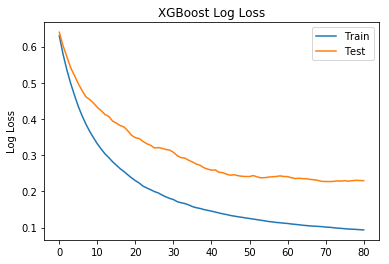

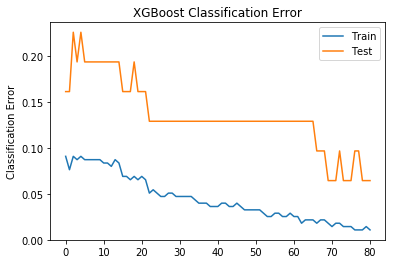

In [132]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()